# Baseball Case Study

## Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

## Importing the required libraries:

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [350]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## EDA (Exploratory Data Analysis)

In [351]:
df.shape

(30, 17)

We have 30 rows and 17 columns including target variable in this dataset

In [352]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

'W' is target column, Rest are independent columns

In [353]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

We can see all the columns are either int or float

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [355]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in any columns

## Descriptive analysis or summary statistics

In [356]:
#statistical summary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [357]:
#lets check for correlation among all the columns
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Since there are many columns , we can't get insights properly. Lets check with heat map

In [358]:
#lets check for skewness of the columns
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

## Data Visualization:

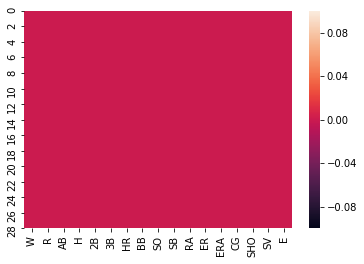

In [359]:
#checking the missing values with visualization technique
sns.heatmap(df.isnull())
plt.show()

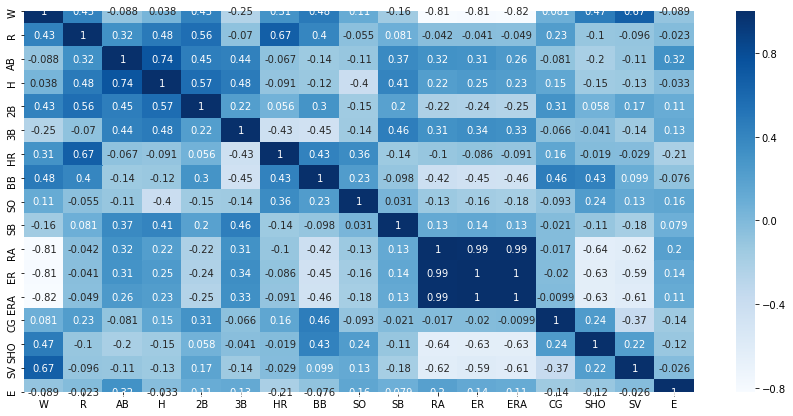

In [360]:
#correlation
fig = plt.figure(figsize=(15,7))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

ER and RA column are having 0.99 correlation with each other, both are providing same data. so one of the columns can be removed.

In [361]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['W'].sort_values(ascending = False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

### Insights obtained

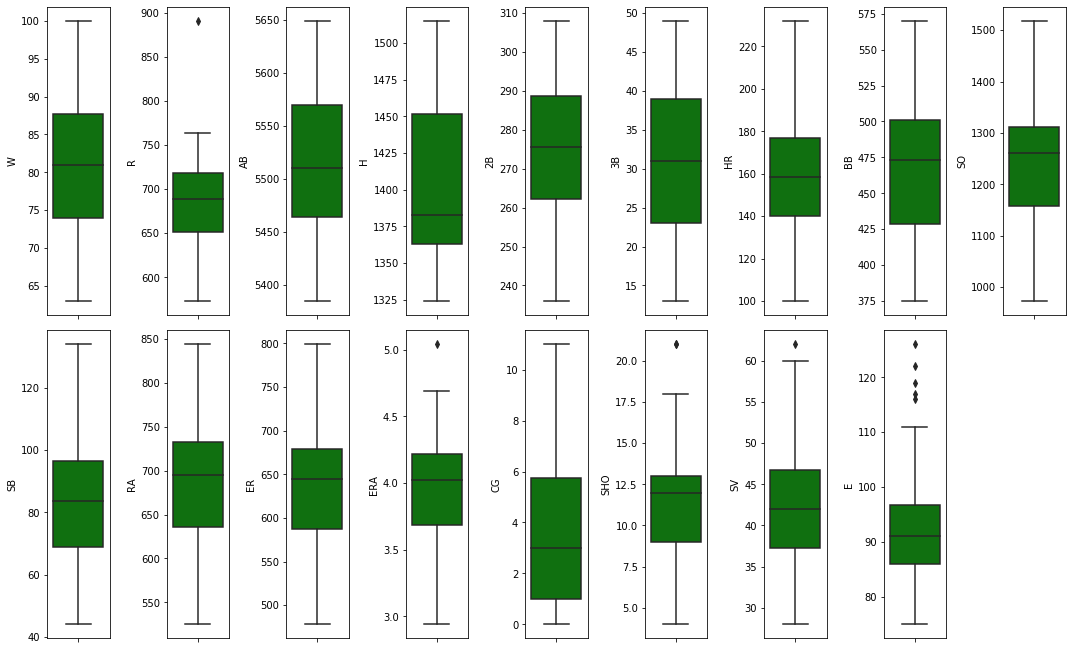

In [362]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 9
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

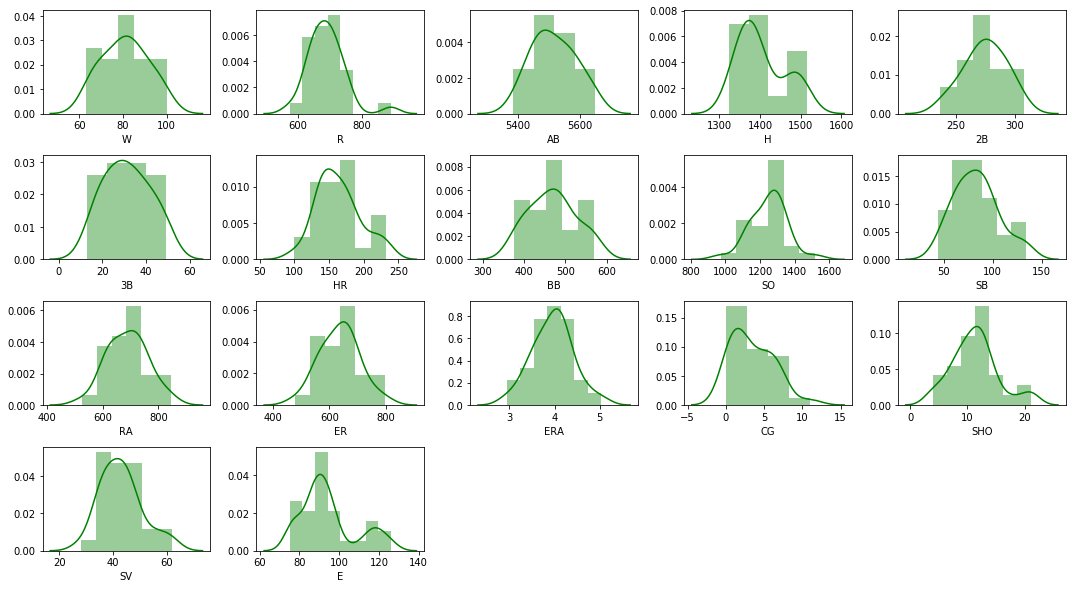

In [363]:
# Lets check the distribution
collist =df.columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

Looks like almost all the columns are normal distributed

## Data Preprocessing

### Outlier Removal

### IQR method

In [364]:
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [365]:
columns_with_outlier = ['R','ERA','SHO','SV','E']
for i in columns_with_outlier:
    outliers_IQR3(df,i)

### Zscore method to remove outliers

In [366]:
df.shape

(30, 17)

In [367]:
#Now lets use Zscore method to remove  outliers
#we can use zscore method, since all the data is almost noraml distrdibuted

In [368]:
z = np.abs(zscore(df))

In [369]:
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [370]:
z = np.abs(zscore(df))
df_new  = df[(z<3).all(axis=1)]
df_new.shape

(30, 17)

we can see only 0 outliers with zscore method

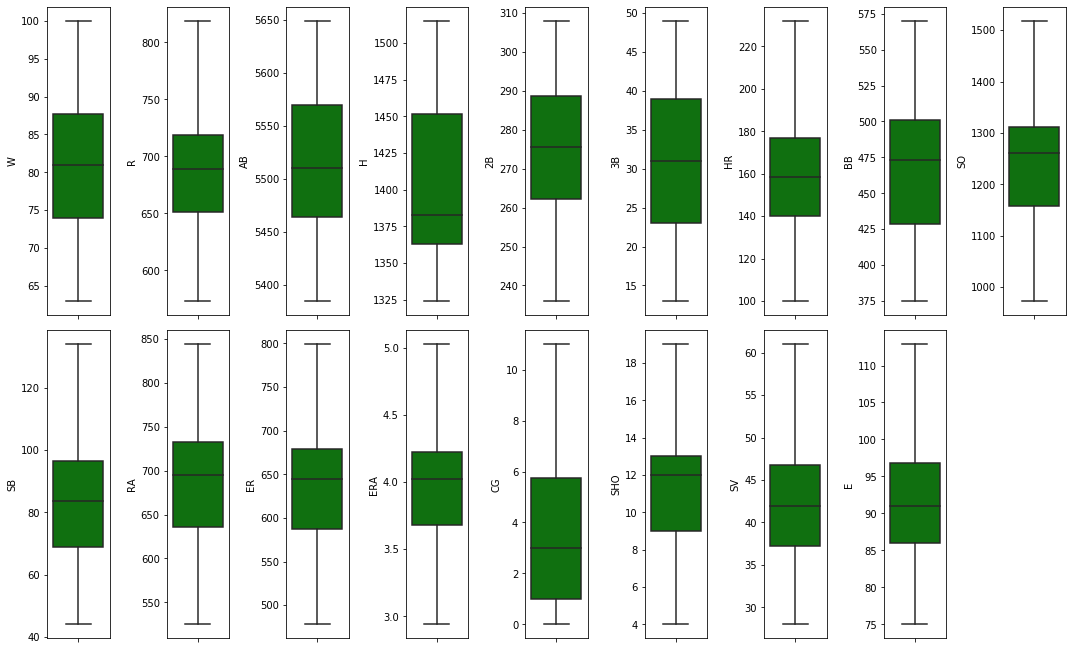

In [371]:
# lets check for outliers among all the columns
collist = df_new.columns
ncol = 9
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

Outliers have been removed compltely from all the columns

### Skewness Reduction

In [372]:
#skewness Reduction
#lets devide X and Y before handing skewness
Y = df_new['W']
X = df_new.drop('W',axis = 1)

In [373]:
X.skew()

R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

In [374]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = X.columns
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X.skew()

R      0.284282
AB     0.183437
H      0.000000
2B    -0.230650
3B     0.129502
HR    -0.000065
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.037969
CG    -0.059785
SHO    0.218030
SV     0.001270
E      0.032939
dtype: float64

Now skewness is in range for all the columns

### Data scaling

In [375]:
#Lets scale the data using minmax scaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.614446,0.719697,0.0,0.888889,0.805556,0.388991,0.041026,0.000000,0.666667,0.363636,0.383178,0.378670,0.367955,0.266667,0.898592,0.442356
1,0.500509,0.310606,0.0,0.569444,0.861111,0.526013,0.328205,0.533945,0.288889,0.548589,0.545171,0.541642,0.367955,0.533333,0.629992,0.383175
2,0.390641,0.204545,0.0,0.930556,0.444444,0.405937,0.810256,0.337615,0.466667,0.360502,0.330218,0.349910,1.000000,0.400000,0.412995,0.151929
3,0.199390,0.560606,0.0,0.333333,0.388889,0.363121,0.148718,0.473394,0.266667,0.551724,0.514019,0.498502,0.792284,0.333333,0.378015,0.768807
4,0.472024,0.833333,0.0,0.736111,1.000000,0.487290,0.410256,0.524771,0.433333,0.871473,0.834891,0.814859,0.792284,0.533333,0.304460,0.383175


Now all the values are in range of 0 and 1

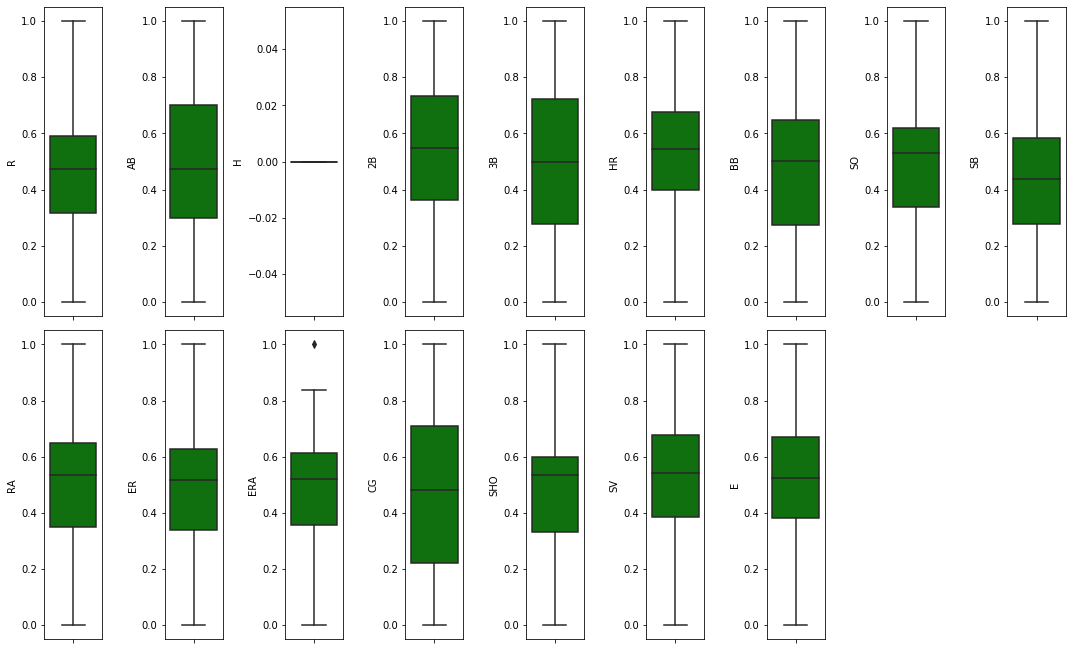

In [376]:
# lets check for outliers among all the columns
collist = X.columns
ncol = 9
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

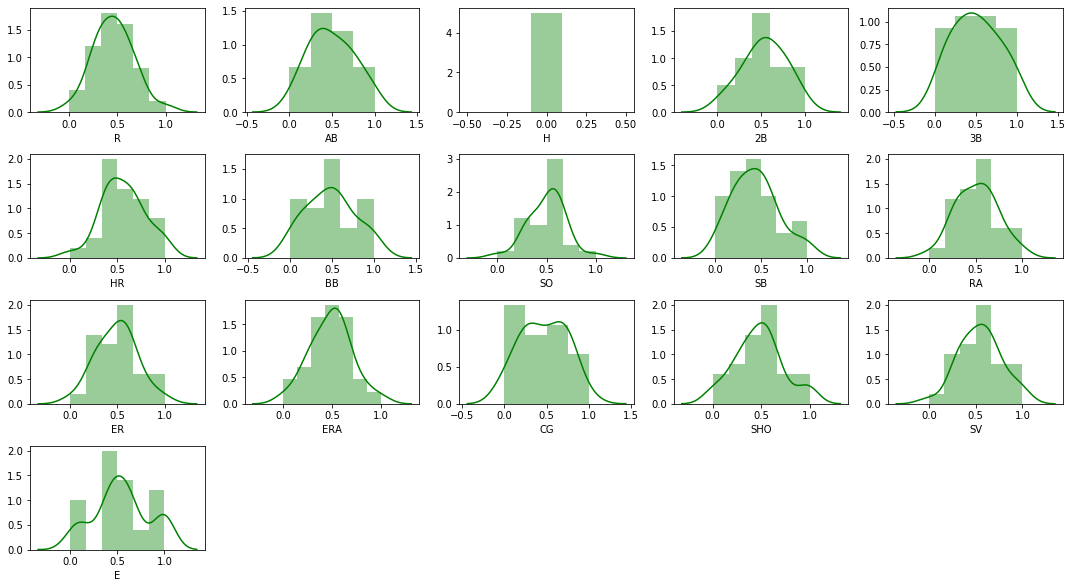

In [377]:
# Lets check the distribution
collist =X.columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(X[collist[i]],color='green')
    plt.tight_layout()

Now the outliers have been removed and all the columns are normal distributed

Data preprocessing is Done

In [378]:
df_samp = X.copy()

In [379]:
df_samp['W'] = Y.values

In [380]:
#correlation
fig = plt.figure(figsize=(15,7))
cor_matrix = df_samp.corr(method='pearson')
#lets check for the correlation of input columns with Target Variable
cor_matrix['W'].sort_values(ascending = False)

W      1.000000
SV     0.665248
BB     0.484342
SHO    0.462688
R      0.438759
2B     0.427797
HR     0.319035
SO     0.111850
CG     0.058044
E     -0.085732
AB    -0.087947
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.820339
H           NaN
Name: W, dtype: float64

<Figure size 1080x504 with 0 Axes>

## Lets Check for Best Random State 

In [381]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

Best r2 score is 0.9572306312371585 on random state 5
Error :
mean absolute error : 6.622712478597596
mean squared error :  67.10441748253689
root mean squared error : 8.1917286016162


In [382]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 5


In [383]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= rand_state )

## Model selection :

In [384]:
#lets Choose Among this Five Models
lr = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [385]:
#checking each model with Cross val score
model_list = [lr,knn,svr,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X,Y,cv = 5,scoring= 'r2')
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.sqrt(r2_score(y_test,pred))-cvs.mean()
    print('Diffrence between cross val score and r2 score is :',difference)
    least_difference.append((m,difference))



LinearRegression()
Scores :
r2 score: 0.9572306312371585
Cross Val score : 0.29271902604860556
Error :
mean absolute error : 1.7913639270857564
mean squared error :  4.201872269884068
root mean squared error : 2.0498468893759036
Difference :
Diffrence between cross val score and r2 score is : 0.6856626128005495


KNeighborsRegressor()
Scores :
r2 score: 0.5179393435812214
Cross Val score : -0.188065143110123
Error :
mean absolute error : 5.6000000000000005
mean squared error :  47.36000000000001
root mean squared error : 6.881860213634102
Difference :
Diffrence between cross val score and r2 score is : 0.9077451717209087


SVR()
Scores :
r2 score: 0.16256895612820654
Cross Val score : -0.35550328783204954
Error :
mean absolute error : 8.175497271644698
mean squared error :  82.27332745303701
root mean squared error : 9.070464566549886
Difference :
Diffrence between cross val score and r2 score is : 0.7587016957259878


RandomForestRegressor()
Scores :
r2 score: 0.5709189031990032
Cro

In [386]:
# We are getting negative cross val score, even after data preprocessing
#since these columns have almost zero correlation with target variaable we can remove these
X.drop(['CG','E','AB','SB','SO','H'],axis =1,inplace  = True)

## Now Lets Check for Best Random State after those columns have been removed

In [387]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 

Best r2 score is 0.9767993936798864 on random state 97


In [388]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= rand_state )

In [389]:
#checking each model with Cross val score
model_list = [lr,knn,svr,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X,Y,cv = 3,scoring= 'r2')
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.sqrt(r2_score(y_test,pred))-cvs.mean()
    print('Diffrence between cross val score and r2 score is :',difference)
    least_difference.append((m,difference))



LinearRegression()
Scores :
r2 score: 0.9767993936798864
Cross Val score : 0.4685540448469769
Error :
mean absolute error : 1.4254077061585346
mean squared error :  2.5766877468175062
root mean squared error : 1.605206449905278
Difference :
Diffrence between cross val score and r2 score is : 0.5197775764623316


KNeighborsRegressor()
Scores :
r2 score: 0.7275633958103638
Cross Val score : 0.32183558921729916
Error :
mean absolute error : 4.828571428571428
mean squared error :  30.25714285714286
root mean squared error : 5.500649312321488
Difference :
Diffrence between cross val score and r2 score is : 0.5311376787169098


SVR()
Scores :
r2 score: 0.247025458024128
Cross Val score : -0.027754425003764942
Error :
mean absolute error : 7.5344040502239285
mean squared error :  83.62627464148359
root mean squared error : 9.14474027195325
Difference :
Diffrence between cross val score and r2 score is : 0.5247709820963109


RandomForestRegressor()
Scores :
r2 score: 0.7703238515251744
Cross

In [390]:
least_difference

[(LinearRegression(), 0.5197775764623316),
 (KNeighborsRegressor(), 0.5311376787169098),
 (SVR(), 0.5247709820963109),
 (RandomForestRegressor(), 0.41332756121420117),
 (AdaBoostRegressor(), 0.36187437395212796)]

Now after removing those columns whose correlation was very low with target variable, our score is incresed

Least diffrence with cross val is for Random forest , so lets choose random forest as our final model

## Hyperparameter Tuning

In [391]:
# lets create the parameter list to pass in GridsearchCv

parameters = {'n_estimators' : [100,200,300,400,500,600,700,800],'criterion':['mse','mae'],'max_depth':[3,4,5,6,7,8,10,25],
             'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,6,7]}
gsv = RandomizedSearchCV(estimator= rf,param_distributions=  parameters,cv =5)
gsv.fit(x_train,y_train)
gsv.best_score_

0.3291349980400663

In [392]:
gsv.best_estimator_

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300)

Our default values are giving more r2 score

## Creating a Final Model as Random Forest:

In [393]:
final_mod = RandomForestRegressor()
final_mod.fit(x_train,y_train)
final_pred = final_mod.predict(x_test)
cvs = cross_val_score(m,X,Y,cv =5)
print('Score')
print('R2_score :',r2_score(y_test,final_pred))
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

Score
R2_score : 0.7485182469680264


Error :
mean absolute error : 4.724285714285715
mean squared error :  27.92987142857144
root mean squared error : 6.226967602806443


## Saving the model:

In [400]:
#using joblib for serialization
import joblib
joblib.dump(final_mod,'baseball_final.obj')

['baseball_final.obj']

In [401]:
baseball_final = joblib.load('baseball_final.obj')

In [402]:
pred = baseball_final.predict(x_test)
r2_score(y_test,pred)

0.7485182469680264

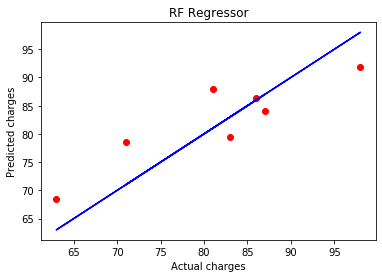

In [403]:
plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = final_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('RF Regressor')
plt.show()

## conclusion

In [404]:
conclusion = pd.DataFrame((advertise_final.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])

In [405]:
conclusion

,0,1,2,3,4,5,6
Predicted,86.39,87.96,78.56,91.85,68.56,84.11,79.44
Actual,86.00,81.00,71.00,98.00,63.00,87.00,83.00


Almost all the values are very close